In [1]:
!pip install nltk
from sklearn.metrics import classification_report

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     ./12_data/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for mess_no, message in enumerate(messages [:10]):
    print (mess_no, message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
messages [0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['label', 'message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages['length'] = messages ['message'].apply(len)

In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

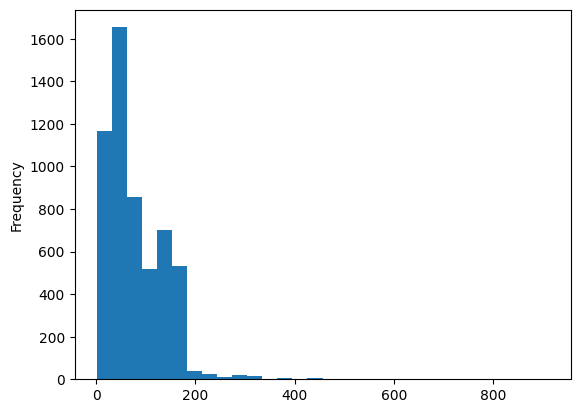

In [16]:
messages['length'].plot.hist(bins=30)

In [17]:
messages ['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
print(messages.columns)

Index(['label', 'message', 'length'], dtype='object')


In [19]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

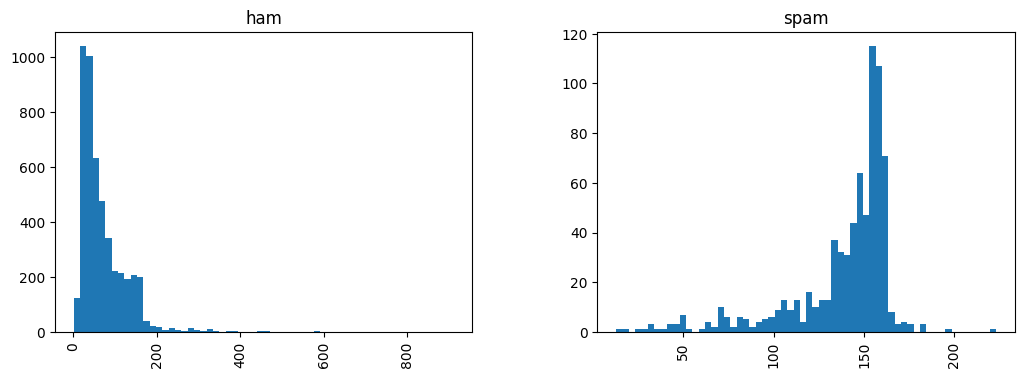

In [20]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

In [21]:
import string

In [22]:
mess = 'Sample message! Notice: it has punctuation.'

In [23]:
nopunc = [c for c in mess if c not in string.punctuation]

In [24]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
nopunc = ''.join(nopunc)

In [28]:
nopunc

'Sample message Notice it has punctuation'

In [29]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [30]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words ('english')]

In [31]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [32]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)


    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [103]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [104]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [107]:
print(len(bow_transformer.vocabulary_))

11425


In [108]:
mess4 = messages['message'][3]

In [109]:
print(mess4)

U dun say so early hor... U c already then say...


In [110]:
bow4 = bow_transformer.transform([mess4])

In [111]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [112]:
print(bow4.shape)

(1, 11425)


In [113]:
bow_transformer.get_feature_names_out()[4068]

'U'

In [114]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [115]:
messages_bow = bow_transformer.transform(messages['message'])

In [116]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [117]:
messages_bow.nnz

50548

In [118]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [119]:
from sklearn.feature_extraction.text import TfidfTransformer

In [120]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [121]:
tfid4 = tfidf_transformer.transform(bow4)

In [122]:
print(tfid4)

  (0, 4068)	0.40832589933384067
  (0, 4629)	0.26619801906087187
  (0, 5261)	0.29729957405868723
  (0, 6204)	0.29953799723697416
  (0, 6222)	0.3187216892949149
  (0, 7186)	0.4389365653379857
  (0, 9554)	0.5385626262927564


In [123]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [124]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [125]:
from sklearn.naive_bayes import MultinomialNB

In [126]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [127]:
spam_detect_model.predict(tfid4)[0]

'ham'

In [128]:
messages['label'][3]

'ham'

In [129]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [130]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [133]:
msg_train

5147    Get your garden ready for summer with a FREE s...
3223    Hi, my love! How goes that day? Fuck, this mor...
1408                       Then we gotta do it after that
1344    Crazy ar he's married. Ü like gd looking guys ...
270     Ringtone Club: Get the UK singles chart on you...
                              ...                        
4195          Can not use foreign stamps in this country.
2598    Got fujitsu, ibm, hp, toshiba... Got a lot of ...
3003           Excellent, I'll see what riley's plans are
4320                  Are you still playing with gautham?
1795                     How much i gave to you. Morning.
Name: message, Length: 3900, dtype: object

In [134]:
from sklearn.pipeline import Pipeline

In [135]:
pipeline = Pipeline ([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [136]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x15799d440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [137]:
predictions = pipeline.predict(msg_test)


In [138]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarn

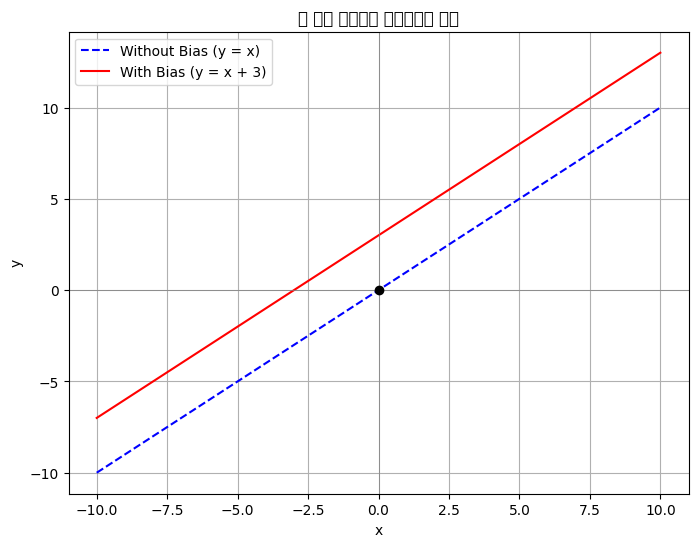

In [141]:
import numpy as np
import matplotlib.pyplot as plt
# x축 값: -10부터 10까지
x = np.linspace(-10, 10, 100)

# 바이어스가 없는 직선: y = x (기울기 1, 원점 통과)
y_no_bias = x

# 바이어스가 있는 직선: y = x + 3 (기울기 1, y절편 3)
y_with_bias = x + 3

# 플로팅
plt.figure(figsize=(8, 6))
plt.plot(x, y_no_bias, label='Without Bias (y = x)', linestyle='--', color='blue')
plt.plot(x, y_with_bias, label='With Bias (y = x + 3)', color='red')

# 원점 (0,0) 표시
plt.scatter(0, 0, color='black', zorder=5)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

# 설정
plt.title("📈 선형 모델에서 바이어스의 역할")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


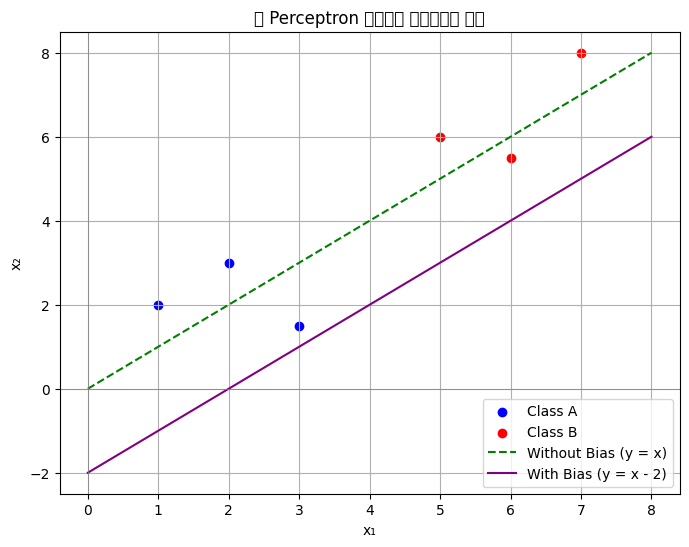

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# 2D 점 데이터 (예시)
class_A = np.array([[1, 2], [2, 3], [3, 1.5]])
class_B = np.array([[5, 6], [6, 5.5], [7, 8]])

# 선 그리기용 x 값
x_values = np.linspace(0, 8, 100)

# 바이어스 없는 선: y = x (원점 지남)
no_bias_line = x_values

# 바이어스 있는 선: y = x - 2 (선이 아래로 이동)
with_bias_line = x_values - 2

# 그래프 그리기
plt.figure(figsize=(8, 6))

# 점 찍기
plt.scatter(class_A[:, 0], class_A[:, 1], color='blue', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='red', label='Class B')

# 선 그리기
plt.plot(x_values, no_bias_line, linestyle='--', label='Without Bias (y = x)', color='green')
plt.plot(x_values, with_bias_line, label='With Bias (y = x - 2)', color='purple')

# 꾸미기
plt.title("📌 Perceptron 분류에서 바이어스의 역할")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()
